<a href="https://colab.research.google.com/github/ramialnajdi/Dynamic-Inventory-Management-System-Using-Reinforcement-Learning-Q-learning-/blob/main/Dynamic_Inventory_Management_System_Using_Reinforcement_Learning_(Q_learning).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dynamic Inventory Management System Using Reinforcement Learning (Q-learning)**


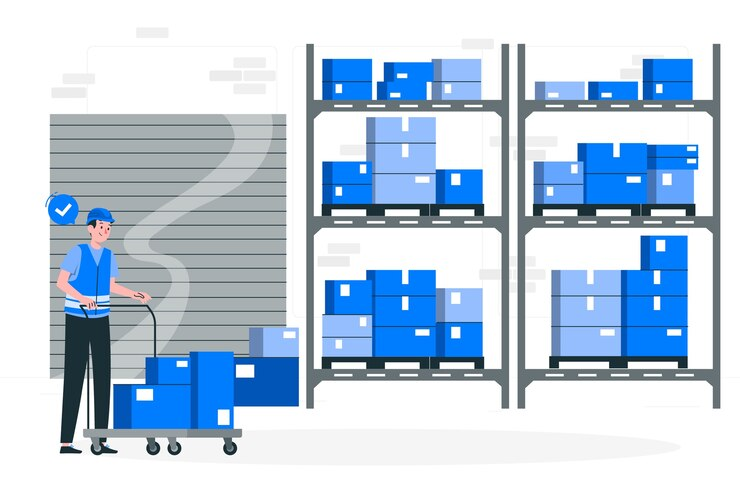

**A Dynamic Inventory Management System** is a tool that automatically tracks and adjusts your inventory in real time. It helps you keep the right amount of stock on hand by:

1. Updating inventory levels whenever items are sold or restocked.
2. Predicting demand based on sales trends, so you know when to order more.
3. Placing automatic orders with suppliers when stock is low, preventing stockouts.
4. Reducing extra inventory that can tie up cash.

In short, it helps you avoid running out of popular items while keeping costs down by not overstocking, making inventory management easier and more efficient.

In this blog, we will build a Dynamic Inventory Management System using reinforcement learning, specifically the Q-learning algorithm. We’ll start by clearly formulating the problem to set the foundation for our solution.

Imagine a scenario where we have an inventory that stores just one product: bottles of water. Our objective is to determine the best way to maintain an optimal stock level of water bottles. The main question we aim to address is: **How can we manage stock levels to meet demand consistently without overstocking or risking stockouts, while dynamically adjusting to seasonal changes and sales trends?**

Using reinforcement learning, we’ll approach this problem as a decision-making task. By applying the Q-learning algorithm, our system will learn to make stocking decisions based on real-time inventory levels, demand patterns, and supplier lead times, ultimately optimizing for cost efficiency and service reliability.



In [83]:
import numpy as np
import random

class InventoryEnvironment:
    def __init__(self):
        self.state_space = ["low_demand", "medium_demand", "high_demand"]
        self.action_space = [100, 200, 300]
        self.reward = {
            "low_demand": [1, 0, 0],
            "medium_demand": [0, 1, 0],
            "high_demand": [0, 0, 1]
        }
        self.number_step = 0
        self.transition_matrix = np.array([
            [0.6, 0.3, 0.1],  # Transitions from Low Demand
            [0.2, 0.5, 0.3],  # Transitions from Medium Demand
            [0.2, 0.3, 0.5]   # Transitions from High Demand
        ])

    def reset(self):
        """Resets the environment to the initial state."""
        self.number_step = 0
        # Start with a random initial state
        initial_state = np.random.choice(list(range(len(self.state_space))))
        return initial_state

    def step(self, state, action):
        """Updates the environment's state based on the agent's action."""
        # Transition to the next state based on the current state
        next_state = np.random.choice(
            list(range(len(self.state_space))),
            p=self.transition_matrix[state]
        )

        # Calculate reward based on the current state and action
        reward = self.reward[self.state_space[state]][action]

        # Determine if the episode should end
        done = self.number_step >= 100
        self.number_step += 1

        return next_state, reward, done


class QLearningAgent:
    def __init__(self, state_size, action_size, learning_rate=0.1, discount_factor=0.95, exploration_rate=1.0, exploration_decay=0.995):
        self.state_size = state_size
        self.action_size = action_size
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor
        self.exploration_rate = exploration_rate
        self.exploration_decay = exploration_decay
        self.q_table = np.zeros((state_size, action_size))  # Initialize Q-table

    def choose_action(self, state):
        if np.random.rand() < self.exploration_rate:
            return random.randint(0, self.action_size - 1)  # Random action (exploration)
        else:
            return np.argmax(self.q_table[state])  # Best known action (exploitation)

    def learn(self, state, action, reward, next_state):
        q_current = self.q_table[state][action]
        q_next_max = np.max(self.q_table[next_state])

        # Q-learning update formula
        self.q_table[state][action] = q_current + self.learning_rate * (reward + self.discount_factor * q_next_max - q_current)

        # Decay exploration rate
        self.exploration_rate *= self.exploration_decay


# Initialize the environment
env = InventoryEnvironment()

# Initialize the agent
agent = QLearningAgent(state_size=3, action_size=3)

# Define the number of episodes
num_episodes = 15

for episode in range(num_episodes):
    state = env.reset()
    total_reward = 0

    while True:
        # Agent chooses an action
        action = agent.choose_action(state)

        # Execute the action in the environment
        next_state, reward, done = env.step(state, action)

        # Agent learns from the experience
        agent.learn(state, action, reward, next_state)

        # Update state and accumulate reward
        state = next_state
        total_reward += reward

        if done:
            print(f"Episode {episode + 1}: Total Reward: {total_reward}")
            break


Episode 1: Total Reward: 47
Episode 2: Total Reward: 73
Episode 3: Total Reward: 84
Episode 4: Total Reward: 82
Episode 5: Total Reward: 92
Episode 6: Total Reward: 97
Episode 7: Total Reward: 97
Episode 8: Total Reward: 98
Episode 9: Total Reward: 99
Episode 10: Total Reward: 101
Episode 11: Total Reward: 101
Episode 12: Total Reward: 101
Episode 13: Total Reward: 101
Episode 14: Total Reward: 101
Episode 15: Total Reward: 101


In [86]:
agent.q_table

array([[17.84115127,  6.13806734,  4.07030715],
       [ 5.46992986, 17.89861844,  5.50224194],
       [ 4.93251327,  5.11143579, 17.84288468]])

# Q-Learning Agent Report: Inventory Management

This report presents the Q-table learned by the Q-learning agent, which is used to make optimal inventory decisions for different demand levels.

## Q-Table Summary

The Q-table below represents the learned Q-values for each state-action pair:

| State          | Order 100 Units | Order 200 Units | Order 300 Units |
|----------------|-----------------|-----------------|-----------------|
| Low Demand     | 17.84           | 6.14            | 4.07            |
| Medium Demand  | 5.47            | 17.90           | 5.50            |
| High Demand    | 4.93            | 5.11            | 17.84           |

### Interpretation of Q-Table

Each row in the Q-table corresponds to a **state**:
- **Low Demand**
- **Medium Demand**
- **High Demand**

Each column represents a different action:
- **Order 100 units**
- **Order 200 units**
- **Order 300 units**

The values in the table represent the Q-values, which estimate the expected cumulative reward for taking each action in a given state.

### Optimal Actions per Demand State

Based on the highest Q-values in each row, the agent has learned the following optimal actions for each demand level:

- **In Low Demand**: Order **100 units** (Q-value = 17.84)
- **In Medium Demand**: Order **200 units** (Q-value = 17.90)
- **In High Demand**: Order **300 units** (Q-value = 17.84)

### Summary

The agent's Q-table suggests it has successfully learned to match the order quantity to demand levels, which optimizes rewards by minimizing stockouts and holding costs.